In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
directorypath=Path.home() / 'Documents' /'Sara'
filepaths=list(directorypath.glob("*"))
print([f.stem for f in filepaths])

['DataSet', 'DataSet_ExcludingDG', 'DataSet_ExcludingDG_Hourly', 'DataSet_Hourly', '~$DataSet']


In [5]:
years=[1396,1397,1398,1399]
complete_data ={y:pd.read_excel(filepaths[0],engine='openpyxl',sheet_name=str(y)) for y in years}
withoutDG_data={y:pd.read_excel(filepaths[1],engine='openpyxl',sheet_name=str(y)) for y in years}

In [12]:
for y in years:
    complete_data[y]['PeakLoad']=complete_data[y].max(axis=1,numeric_only=True)
    withoutDG_data[y]['PeakLoad']=withoutDG_data[y].max(axis=1,numeric_only=True)


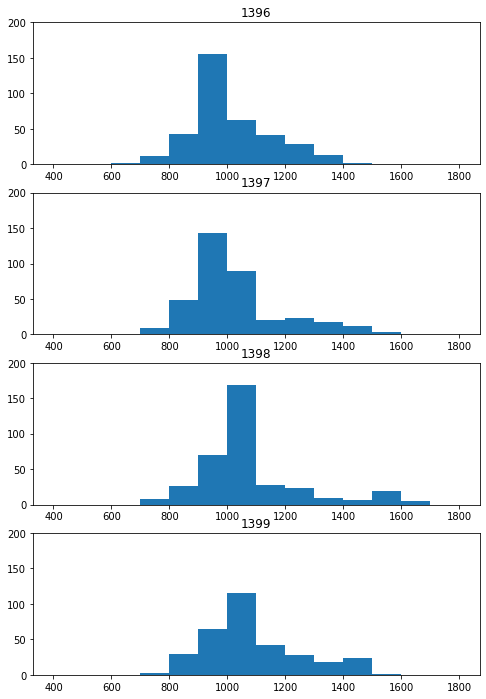

In [34]:

fig,ax =plt.subplots(len(years),1)
fig.set_size_inches(8,3*len(years))
for i,y in enumerate(years):
    ax[i].hist(complete_data[y].PeakLoad,bins=list(range(400,1900,100)))
    ax[i].set_title(y)
    ax[i].set_ylim(0,200)



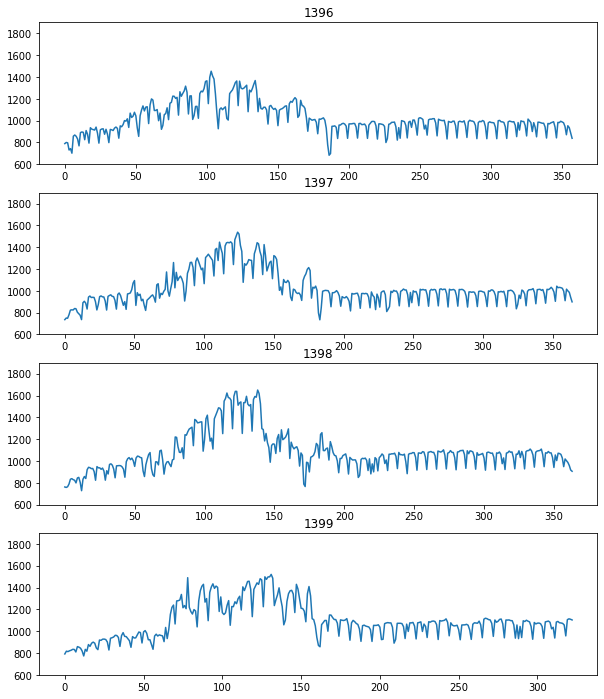

In [28]:
fig,ax =plt.subplots(len(years),1)
fig.set_size_inches(10,3*len(years))
for i,y in enumerate(years):
    ax[i].plot(complete_data[y].PeakLoad)
    ax[i].set_title(y)
    ax[i].set_ylim(600,1900)

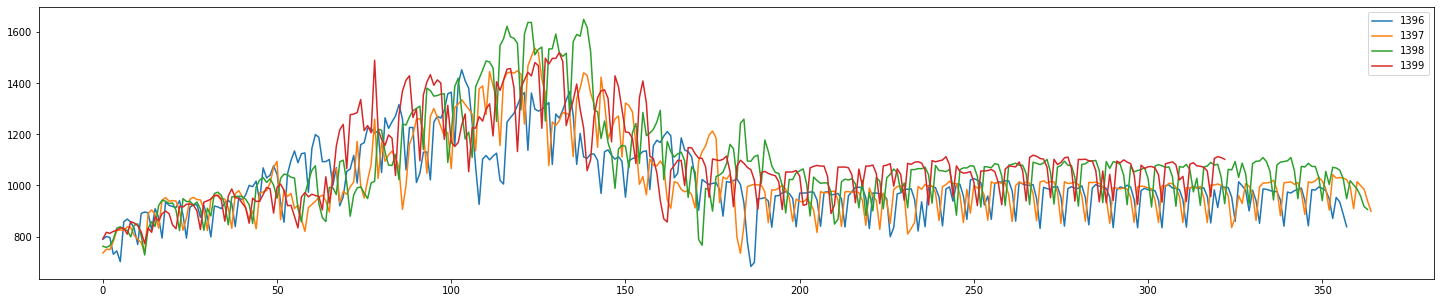

In [32]:
plt.figure(figsize=(25,5))
for y in years:
    plt.plot(complete_data[y].PeakLoad,label=y)
plt.legend()